<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# LeFigaro - House price analysis

**Description:**
As a investor I want to know what is the most interesting investment to be made by number of rooms in a particular area.


**Tags:** #investors #immobilier #markdown #graph #chart

**Author:** [Mahanamana Andriamiharisoa](https://www.linkedin.com/in/mahanamana/)

## Input

### Import libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import naas

### Setup variables

In [2]:
title = "House price analysis"
lefigaro_url="https://immobilier.lefigaro.fr/annonces/immobilier-vente-maison-paris.html?page=" #link can be changed but keep ?page= to ensure scraping
PAGES = 20 # change the number of pages to scrape

# Output paths
output_image = f"{title}.png"
output_html = f"{title}.html"

### Setup scheduler

In [3]:
# if you want to activate or delete the scheduler, uncomment the lines below:

#naas.scheduler.add(cron="0 8 * * *") #every day at 8am
#naas.scheduler.delete() 

## Model

### Define functions to get

In [4]:
def get_prices(items):
    prices=[]
    for item in items:
        price = item.select(".price")[0].get_text().strip().replace("€", "").split()
        prices.append("".join(price))
    return prices

def get_location(items):
    locations=[]
    for item in items:
        location=item.select(".title-location")[0].get_text().strip().split(" ")
        location.pop()
        location = "".join(location)
        locations.append(location)
    return locations

def get_vars(items):
    options= []
    piece=[]
    chambre=[]
    surface=[]
    for item in items:
        option = item.select(".options")
        try:
            piece.append(option[0].get_text().strip().split(" ")[0])
        except IndexError:
            piece.append(None)
        try:
            chambre.append(option[1].get_text().strip().split(" ")[0])
        except IndexError:
            chambre.append(None)
        try:
            surface.append(option[2].get_text().strip().split("M")[0])
        except IndexError:
            surface.append(None)
  
    return [piece, chambre, surface]

### Use functions to scrape data

In [5]:
for page in range(PAGES):
    url = lefigaro_url+str(page+1)

    whole_html = requests.get(url)

    soup = BeautifulSoup(whole_html.content, "html.parser")
    
    cartouche_list = soup.findAll(True, {"class":"cartouche-liste"})
    
    data = pd.DataFrame({
        "price_(euro)": get_prices(cartouche_list),
        "localisation": get_location(cartouche_list),
        "piece": get_vars(cartouche_list)[0],
        "chambre": get_vars(cartouche_list)[1],
        "surface_(m2)": get_vars(cartouche_list)[2]
    })
    
    if page==0:
        data.to_csv("figaro_dataset.csv", index=False, encoding='utf-8')
        print(str(page+1) + " file creation iteration.")
    elif page != 0:
        data.to_csv("figaro_dataset.csv", mode='a', index=False, encoding='utf-8', header=False)
        print(str(page+1) + " file appending iteration.")

1 file creation iteration.
2 file appending iteration.
3 file appending iteration.
4 file appending iteration.
5 file appending iteration.
6 file appending iteration.
7 file appending iteration.
8 file appending iteration.
9 file appending iteration.
10 file appending iteration.
11 file appending iteration.
12 file appending iteration.
13 file appending iteration.
14 file appending iteration.
15 file appending iteration.
16 file appending iteration.
17 file appending iteration.
18 file appending iteration.
19 file appending iteration.
20 file appending iteration.


In [6]:
df=pd.read_csv("figaro_dataset.csv")
df.dropna(axis=0, inplace=True)

### Clean data to create outputs

In [7]:
try:
    df['surface_(m2)']=df['surface_(m2)'].str.split(" ", expand=True)[0]
    df = df[~df['surface_(m2)'].str.contains('[0-9]+[a-zA-Z]+', regex=True)] 
except:
    pass
try:
    df=df[~df['price_(euro)'].str.contains('[^0-9]', regex=True)]
except:
    pass

df['price_(euro)']=pd.to_numeric(df['price_(euro)'], downcast='float', errors='coerce')
df['piece']=pd.to_numeric(df['piece'], errors='coerce')
df['chambre']=pd.to_numeric(df['chambre'], errors='coerce')
df['surface_(m2)']=pd.to_numeric(df['surface_(m2)'], errors='coerce')
df.dropna(axis=0, inplace=True)

## Output

### Create chart

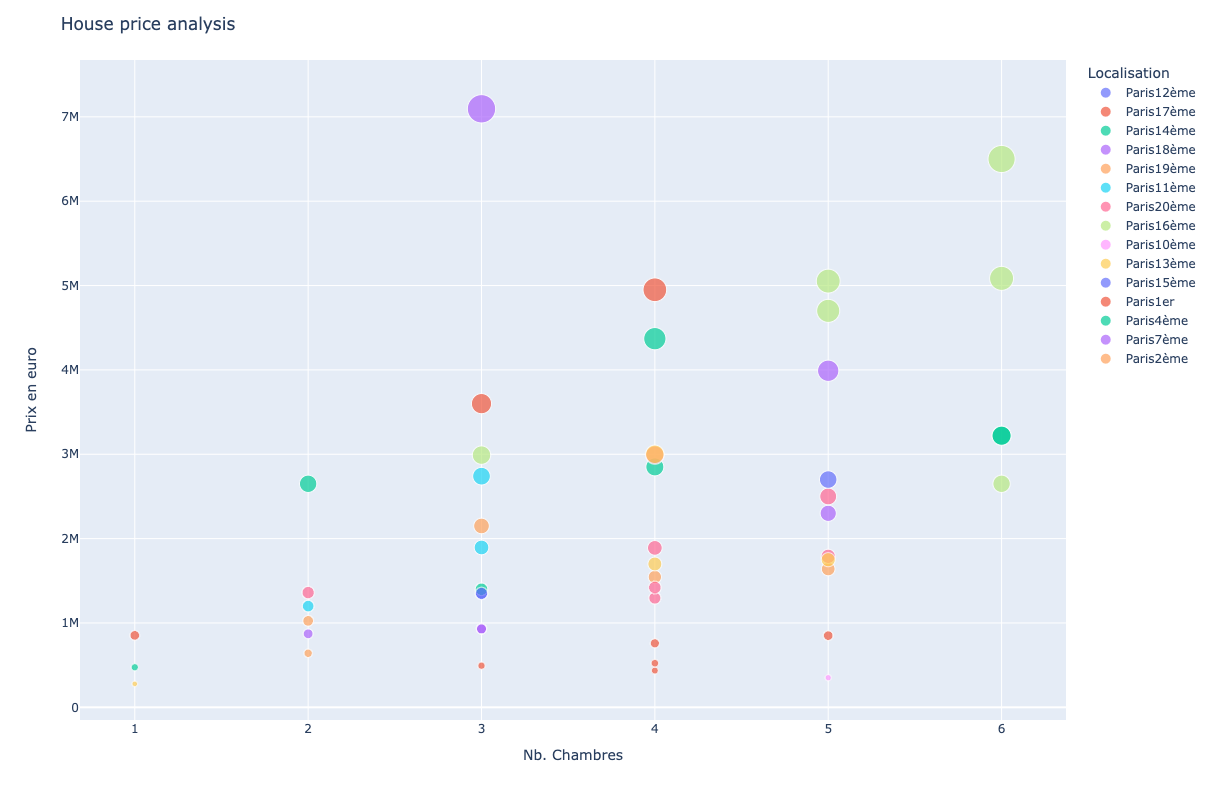

In [13]:
labels = {
    "chambre": "Nb. Chambres",
    "piece": "Nb. Pieces",
    "localisation": "Localisation",
    "price_(euro)": "Prix en euro"
}
fig = px.scatter(df[:50],
                 x = "chambre", 
                 y = "price_(euro)",
                 hover_name = 'localisation',
                 color = 'localisation',
                 size = 'price_(euro)',
                 labels = labels,
                 width = 1000, height = 800)

fig.update_layout(title = title)
fig.show()

### Export in PNG and HTML

In [9]:
fig.write_image(output_image, width=1200)
fig.write_html(output_html)

### Create shareable assets

In [12]:
link_image = naas.asset.add(output_image)
link_html = naas.asset.add(output_html, {"inline": True})

👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete
👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete
